<a id="1.1"></a>
<h2 style="font-family: Roboto; font-size: 35px; font-style: normal; font-weight: normal; text-align:center; display:fill; text-decoration: none; padding:10px; letter-spacing: 1px; color: White; background-color:#008080;"><b>Introduction to Artificial Neural Network & the Keras Framework</h2>

<h3 style="font-family: Roboto;text-align:center;letter-spacing: 1px;"><b>Introduction to Keras and Tensorflow with Python.</h3>



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
from tensorflow import keras

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
mnist = keras.datasets.mnist 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
print("Training data: {}, {}".format(train_images.shape, train_labels.shape))

Training data: (60000, 28, 28), (60000,)


In [4]:
print("Test data: {}, {}".format(test_images.shape, test_labels.shape))

Test data: (10000, 28, 28), (10000,)


In [5]:
class_labels = np.unique(train_labels) 
print("There are {} classes in the dataset. They are: {}".format(len(class_labels), class_labels))

There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


<div style="font-family:Roboto;background-color:black; padding:20px; font-size:30px; text-align:center">

Visualizing the Images

</div>

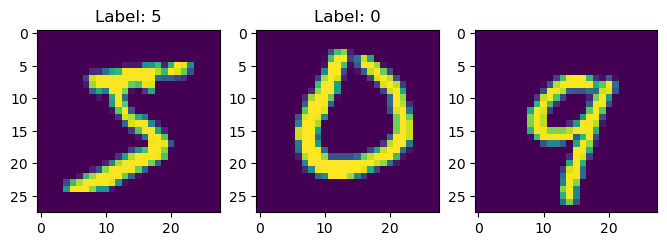

In [6]:
plt.figure(figsize=(8, 5)) 

plt.subplot(1,3,1)
plt.imshow(train_images[0]) 
plt.title("Label: {}".format(train_labels[0])) 

plt.subplot(1,3,2) 
plt.imshow(train_images[2500])
plt.title("Label: {}".format(train_labels[2500])) 

plt.subplot(1,3,3) 
plt.imshow(test_images[12]) 

plt.show()

<div style="font-family:Roboto;background-color:black; padding:20px; font-size:30px; text-align:center">

Scale the Data

</div>

In [7]:
# scale our dataset to range between 0 and 1.
#  Dividing the data by 255 scales to the required range.count

train_images = train_images / 255.0 
test_images = test_images / 255.0

<div style="font-family:Roboto;background-color:black; padding:20px; font-size:30px; text-align:center">

Split training data into training and validation sets

</div>

In [8]:
x_train = train_images[0:50000] 
x_val = train_images[50000:] 

y_train = train_labels[0:50000] 
y_val = train_labels[50000:] 

print("x_train: {}".format(x_train.shape)) 
print("x_val: {}".format(x_val.shape)) 

print("y_train: {}".format(y_train.shape)) 
print("y_val: {}".format(y_val.shape)) 

x_train: (50000, 28, 28)
x_val: (10000, 28, 28)
y_train: (50000,)
y_val: (10000,)


<div style="font-family:Roboto;background-color:black; padding:20px; font-size:30px; text-align:center">

Reshape data from 28*28 array to single array

</div>

In [9]:
new_dimension = np.prod(train_images.shape[1:]) 
x_train = x_train.reshape(x_train.shape[0], new_dimension) 
x_val = x_val.reshape(x_val.shape[0], new_dimension) 
test_images = test_images.reshape(test_images.shape[0], new_dimension) 

print("x_train: {}".format(x_train.shape)) 
print("x_val: {}".format(x_val.shape)) 
print("test_images: {}".format(test_images.shape)) 

x_train: (50000, 784)
x_val: (10000, 784)
test_images: (10000, 784)


<div style="font-family:Roboto;background-color:black; padding:20px; font-size:30px; text-align:center">

Encode labels to categorical variables

</div>

In [10]:
from tensorflow.keras.utils import to_categorical
 
no_labels = 10
y_train = to_categorical(y_train, no_labels) 
y_val = to_categorical(y_val, no_labels) 
y_test = to_categorical(test_labels, no_labels)

<div style="font-family:Roboto;background-color:black; padding:20px; font-size:30px; text-align:center">

Activation Functions and Neural Hyperparameters

</div>

In [11]:
X = tf.placeholder(tf.float32, [None, new_dimension]) 
Y = tf.placeholder(tf.float32, [None, no_labels])

# create model architecture 
def multilayer_perceptron(x, no_classes, first_layer_neurons=256, second_layer_neurons=128):  
    # first layer  
    first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))  
    first_bias = tf.Variable(tf.zeros([first_layer_neurons]))  
    first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))   
    
    # second layer  
    second_weight = tf.Variable(tf.random_uniform([first_layer_neurons,second_layer_neurons]))  
    second_bias = tf.Variable(tf.zeros([second_layer_neurons]))  
    second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight),                                           second_bias))   
    # output layer  
    final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))  
    final_bias = tf.Variable(tf.zeros([no_classes])) 
    logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)   

    return logits

<div style="font-family:Roboto;background-color:black; padding:20px; font-size:30px; text-align:center">

Call the multilayer perceptron function

</div>

In [12]:
logits = multilayer_perceptron(X, no_labels) 

learning_rate = 0.01 
#we define the loss and optimiser for the network 
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y)) 
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate) 
train_op = optimiser.minimize(loss_op)

#initialise the variables 
init = tf.global_variables_initializer()

epochs = 20 
batch_size = 1000 
iteration = len(x_train) // batch_size  

#train model 
with tf.Session() as session:  
    session.run(init)  
    for epoch in range(epochs):    
        average_cost = 0    
        start, end = 0, batch_size

        for i in range(iteration):     
             batch_x, batch_y = x_train[start: end], y_train[start: end]     
             _, loss = session.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})     
             start += batch_size      
             end += batch_size       
             #average loss      
             average_cost += loss/iteration    
        print("Epoch========{}".format(epoch))      
             
    #evaluate model  
    prediction = tf.nn.softmax(logits)  
    ground_truth = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))  
    accuracy = tf.reduce_mean(tf.cast(ground_truth, "float")) 
    print("Accuracy: {}".format(accuracy.eval({X: test_images, Y: y_test})))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Epoch========0
Epoch========1
Epoch========2
Epoch========3
Epoch========4
Epoch========5
Epoch========6
Epoch========7
Epoch========8
Epoch========9
Epoch========10
Epoch========11
Epoch========12
Epoch========13
Epoch========14
Epoch========15
Epoch========16
Epoch========17
Epoch========18
Epoch========19
Accuracy: 0.8822000026702881


<div style="font-family:Roboto;background-color:black; padding:20px; font-size:30px; text-align:center">

Optimization for training deep neural networks

</div>

In [13]:
#Building a Sequential Feed Forward Network in Keras 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.models import Sequential 

model = Sequential() 
model.add(Dense(256, activation='relu', input_shape=(new_dimension,))) 
model.add(Dense(128, activation='relu')) 
model.add(Dense(no_labels, activation='softmax')) 
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy,               
              metrics=['accuracy']) 
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=1000) 
                    
test_loss, test_accuracy = model.evaluate(test_images, y_test) 

print('Test loss: {}'.format(test_loss)) 
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 1s 22us/sample - loss: 0.6873 - acc: 0.8183 - val_loss: 0.2559 - val_acc: 0.9262


c:\Users\adeke\anaconda3\lib\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Epoch 2/20
50000/50000 [==============================] - 1s 21us/sample - loss: 0.2344 - acc: 0.9324 - val_loss: 0.1832 - val_acc: 0.9500
Epoch 3/20
50000/50000 [==============================] - 1s 22us/sample - loss: 0.1731 - acc: 0.9503 - val_loss: 0.1460 - val_acc: 0.9579
Epoch 4/20
50000/50000 [==============================] - 1s 21us/sample - loss: 0.1350 - acc: 0.9614 - val_loss: 0.1287 - val_acc: 0.9638
Epoch 5/20
50000/50000 [==============================] - 1s 24us/sample - loss: 0.1078 - acc: 0.9695 - val_loss: 0.1166 - val_acc: 0.9670
Epoch 6/20
50000/50000 [==============================] - 1s 21us/sample - loss: 0.0907 - acc: 0.9740 - val_loss: 0.1051 - val_acc: 0.9696
Epoch 7/20
50000/50000 [==============================] - 1s 21us/sample - loss: 0.0762 - acc: 0.9783 - val_loss: 0.0970 - val_acc: 0.9722
Epoch 8/20
50000/50000 [==============================] - 1s 21us/sample - loss: 0.0646 - acc: 0.9816 - val_loss: 0.0909 - val_acc: 0.9725
Epoch 9/20
50000/50000 [===

Text(0.5, 1.0, 'Loss Curves - before regularisation')

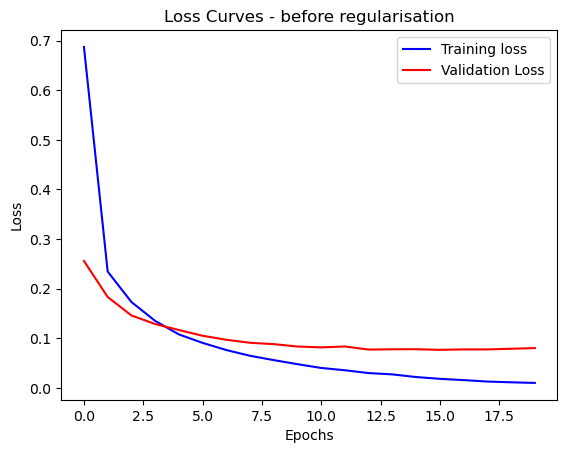

In [14]:
# Check for Overfitting

plt.figure() 
plt.plot(history.history['loss'], 'blue') 
plt.plot(history.history['val_loss'], 'red') 
plt.legend(['Training loss', 'Validation Loss']) 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.title('Loss Curves - before regularisation')


### Although the validation and training loss seem great, we can see that the validation 
### Loss increases  
### This identifies overfitting in our network. How do we proceed? 
### Introduce regularisation to the model.

In [16]:
from tensorflow.keras.layers import Dropout 
reg_model = Sequential() 
reg_model.add(Dense(256, activation='relu', input_shape=(new_dimension,))) 
reg_model.add(Dropout(0.4))
reg_model.add(Dense(128, activation='relu')) 
reg_model.add(Dropout(0.4)) 
reg_model.add(Dense(no_labels, activation='softmax')) 

reg_model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, 
                  metrics=['accuracy'])               
reg_history = reg_model.fit(x_train, y_train, validation_data=(x_val, y_val),                   
                            epochs=20, batch_size=1000) 
test_loss, test_accuracy = reg_model.evaluate(test_images, y_test) 
print('Test loss: {}'.format(test_loss)) 
print('Test accuracy: {}'.format(test_accuracy)) 

test_loss, test_accuracy = reg_model.evaluate(test_images, y_test) 
print('Test loss: {}'.format(test_loss)) 
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 1s 27us/sample - loss: 0.9956 - acc: 0.6859 - val_loss: 0.2884 - val_acc: 0.9197
Epoch 2/20
50000/50000 [==============================] - 1s 30us/sample - loss: 0.3745 - acc: 0.8888 - val_loss: 0.2002 - val_acc: 0.9429
Epoch 3/20
50000/50000 [==============================] - 2s 31us/sample - loss: 0.2785 - acc: 0.9169 - val_loss: 0.1638 - val_acc: 0.9543
Epoch 4/20
50000/50000 [==============================] - 2s 31us/sample - loss: 0.2344 - acc: 0.9318 - val_loss: 0.1379 - val_acc: 0.9613
Epoch 5/20
50000/50000 [==============================] - 2s 33us/sample - loss: 0.1999 - acc: 0.9418 - val_loss: 0.1243 - val_acc: 0.9635
Epoch 6/20
50000/50000 [==============================] - 2s 31us/sample - loss: 0.1794 - acc: 0.9468 - val_loss: 0.1147 - val_acc: 0.9666
Epoch 7/20
50000/50000 [==============================] - 2s 31us/sample - loss: 0.1591 - acc: 0.9543 - val_loss: 0.

Text(0.5, 1.0, 'Loss Curves - after regularisation')

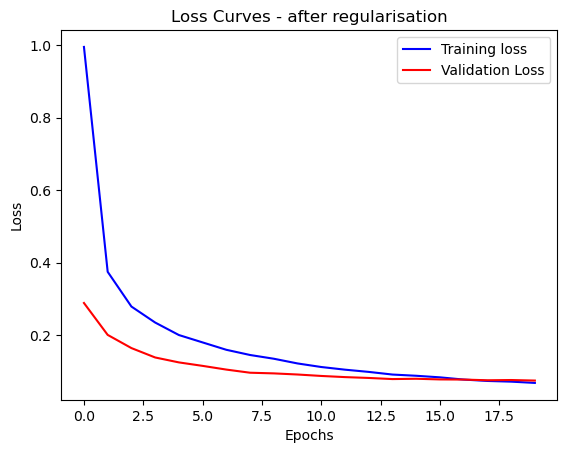

In [17]:
plt.figure() 
plt.plot(reg_history.history['loss'], 'blue') 
plt.plot(reg_history.history['val_loss'], 'red') 
plt.legend(['Training loss', 'Validation Loss']) 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.title('Loss Curves - after regularisation')